## Лабораторная работа 3.

Орешко Алёна Владимировна. 16.03.2025

## Анимация движения секущей прямой к заданной линии на плоскости

## Задание 3.1а). Анимированное построение линии на плоскости

Подключение библиотек. %matplotlib widget - командa для корректного отображения анимации в интерактивном документе

In [6]:
import numpy as np
import ipywidgets 
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
%matplotlib widget

Определение ф-ции, создание переменных.

Создание двух массивов:
x_array - массив равномерно распределенных чисел на отрезке $[x_{\text{min}};x_{\text{max}}]$ с шагом $step$.
y_array - массив соответствующих значений.

Создание матрицы из двух массивов.

In [8]:
def y(x):
 return np.sin(x)**4
x_min = 1.; x_max = 5.; step = 0.05
x_array = np.arange(x_min, x_max, step)
y_array = y(x_array)
matrix = np.transpose([x_array, y_array])

С помощью функции figure из модуля pyplot создадим графическое окно
fig1 , в котором в дальнейшем будет отображаться анимация

C помощью функции axes из модуля pyplot cоздадим графическую область
ax1 и зададим для нее пределы по осям

С помощью функции plot из пакета pyplot создадим в графической области
ax1 графический объект типа Line2D синего цвета, координаты которого пока не
определены

<class 'matplotlib.lines.Line2D'>


(array([], dtype=float64), array([], dtype=float64))

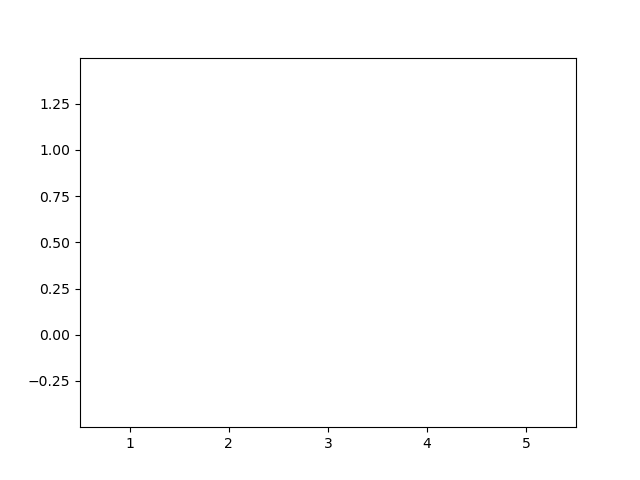

In [10]:
fig1 = plt.figure()
y_min, y_max = np.min(y_array), np.max(y_array)
ax1 = plt.axes()
plt.axis([x_min-0.5, x_max+0.5, y_min-0.5, y_max+0.5])
line1, = ax1.plot([],[],'b')
print(type(line1))
line1.get_xdata(), line1.get_ydata()

Определим пользовательскую функцию одного аргумента at_frame1 , которая
будет вызываться в каждом кадре анимации.
Единственный аргумент функции at_frame1 является массивом из и координат
точки графика функции. Функция at_frame1 добавляет к графическому объекту
line1 точку с координатами (x,y)

In [15]:
def at_frame1(point):
 """добавляет к объекту line1 точку с координатами (point[0],point[1])

 Arguments :

 point : массив из двух элементов

 Returns : None
 """
 x_coord = list(line1.get_xdata())
 y_coord = list(line1.get_ydata())

 x_coord.append(point[0])
 y_coord.append(point[1])

 line1.set_data(x_coord, y_coord) 

С помощью функции help и команды ? извлекем строки документации для
пользовательской функции at_frame1

In [18]:
help(at_frame1)

Help on function at_frame1 in module __main__:

at_frame1(point)
    добавляет к объекту line1 точку с координатами (point[0],point[1])

    Arguments :

    point : массив из двух элементов

    Returns : None



Атрибут _ _doc_ _ объекта-функции содержит строки документации

In [21]:
print(at_frame1.__doc__)

добавляет к объекту line1 точку с координатами (point[0],point[1])

 Arguments :

 point : массив из двух элементов

 Returns : None
 


Для построения анимации полагаем аргумент frames для функции
FuncAnimation следующим образом: frames=matrix . Это означает, что
количество кадров анимации будет совпадать с количеством строк матрицы
matrix . При этом для каждого кадра анимации будет вызываться функция
at_frame1 со значением аргумента, равным строке матрицы matrix , индекс
которой соответствует номеру кадра.


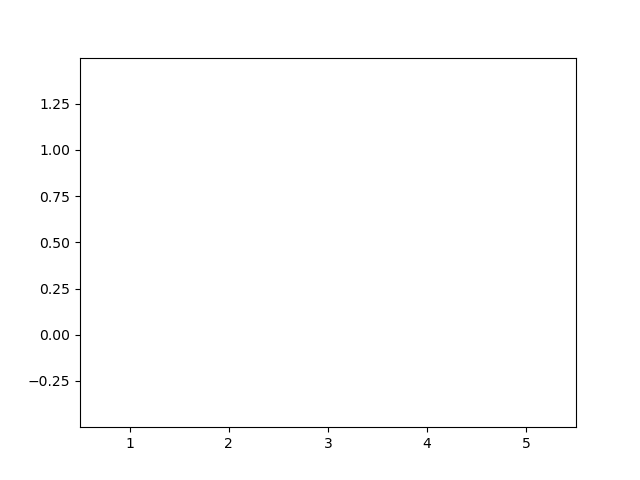

In [24]:
fig1 = plt.figure()
ax1 = plt.axes()
plt.axis([x_min-0.5, x_max+0.5, y_min-0.5, y_max+0.5])
line1, = ax1.plot([], [],'b')
FuncAnimation(fig1, at_frame1, frames=matrix, repeat=False, interval=15)

## Задание 3.1б)

x = x(t), y = y(t) по значениям t, последовательно
изменяющимся от $t_{\text{min}}$ до $t_{\text{max}}$ с шагом step =( $t_{\text{min}}$ - $t_{\text{max}})$)/100

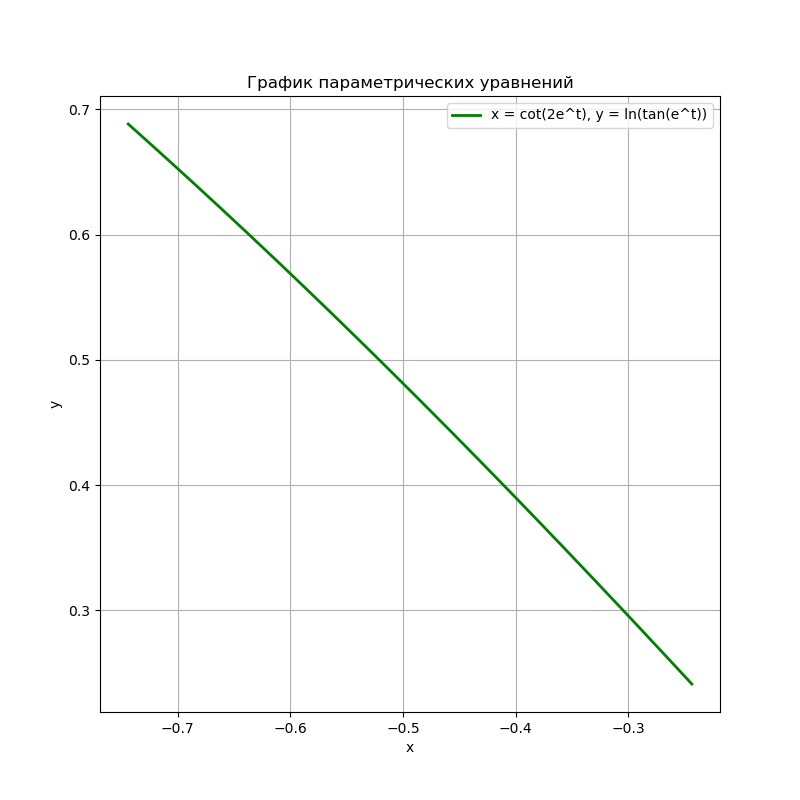

Производная dx/dt: -2*(tan(2*exp(t))**2 + 1)*exp(t)/tan(2*exp(t))**2
Производная dy/dt: (tan(exp(t))**2 + 1)*exp(t)/tan(exp(t))
Символическое выражение для ρ(φ): 2*a*cos(phi) + l


In [28]:
import numpy as np
import sympy
import matplotlib.pyplot as plt

t_np = np.linspace(-0.1, 0.1, 100)
e_t = np.exp(t_np)
x_param = 1 / np.tan(2 * e_t)  # cot(2e^t)
y_param = np.log(np.tan(e_t))   # ln(tan(e^t))

mask = np.isfinite(x_param) & np.isfinite(y_param)
x_param = x_param[mask]
y_param = y_param[mask]
t_np = t_np[mask]

plt.figure(figsize=(8, 8))
plt.plot(x_param, y_param, 'g-', lw=2, label='x = cot(2e^t), y = ln(tan(e^t))')
plt.grid(True)
plt.title('График параметрических уравнений')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

t_sym = sympy.symbols('t')
x_sym = 1 / sympy.tan(2 * sympy.exp(t_sym))  
y_sym = sympy.log(sympy.tan(sympy.exp(t_sym)))  

dx_dt = sympy.diff(x_sym, t_sym)
dy_dt = sympy.diff(y_sym, t_sym)
print("Производная dx/dt:", dx_dt)
print("Производная dy/dt:", dy_dt)

phi_sym = sympy.symbols('phi')
a, l = sympy.symbols('a l')
ro_sym = 2 * a * sympy.cos(phi_sym) + l
print("Символическое выражение для ρ(φ):", ro_sym)

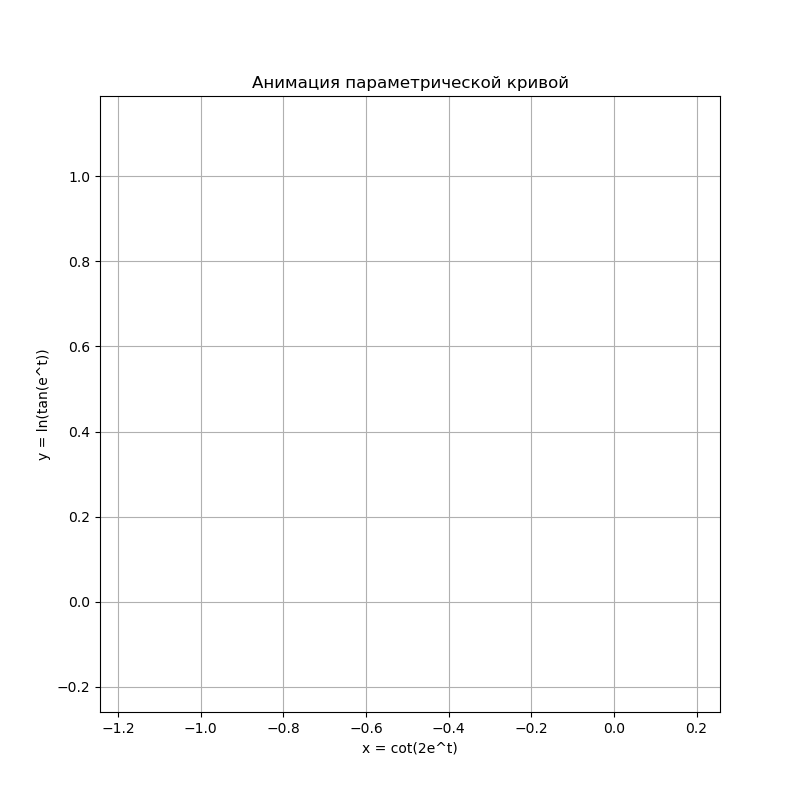

In [29]:
from matplotlib.animation import FuncAnimation

t_np = np.linspace(-0.1, 0.1, 100)
e_t = np.exp(t_np)
x_param = 1 / np.tan(2 * e_t)  # cot(2e^t)
y_param = np.log(np.tan(e_t))   # ln(tan(e^t))

mask = np.isfinite(x_param) & np.isfinite(y_param)
x_param = x_param[mask]
y_param = y_param[mask]
t_np = t_np[mask]
#определение границ графика
x_min, x_max = np.min(x_param), np.max(x_param)
y_min, y_max = np.min(y_param), np.max(y_param)

fig1 = plt.figure(figsize=(8, 8))
ax1 = plt.axes()
ax1.set_xlim(x_min-0.5, x_max+0.5)
ax1.set_ylim(y_min-0.5, y_max+0.5)
ax1.grid(True)
ax1.set_title('Анимация параметрической кривой')
ax1.set_xlabel('x = cot(2e^t)')
ax1.set_ylabel('y = ln(tan(e^t))')

line1, = ax1.plot([], [], 'b-', lw=2)

def init():
    line1.set_data([], [])
    return line1,

def animate(i):
    line1.set_data(x_param[:i+1], y_param[:i+1])
    return line1,

ani = FuncAnimation(fig1, animate, frames=len(t_np),
                    init_func=init, blit=True, interval=15, repeat=False)

plt.show()

$ x=cot(2e^t); y=ln(tan2e^t)$

## Задание 3.2. Движение точки по линии на плоскости

с помощью функции figure создадим графическое окно, в котором в
дальнейшем будет отображаться анимация;
с помощью функции axes cоздадим графическую область и зададим для нее
пределы по осям с помощью функции axis ;
с помощью функции plot создадим в графической области графический
объект типа Line2D синего цвета 'b' , координаты которого описывают
аналитическую функцию;
с помощью функции plot создадим в графической области графический
объект типа Line2D зеленого цвета с маркером в виде кружка 'go' ,
координаты которого пока неизвестны.


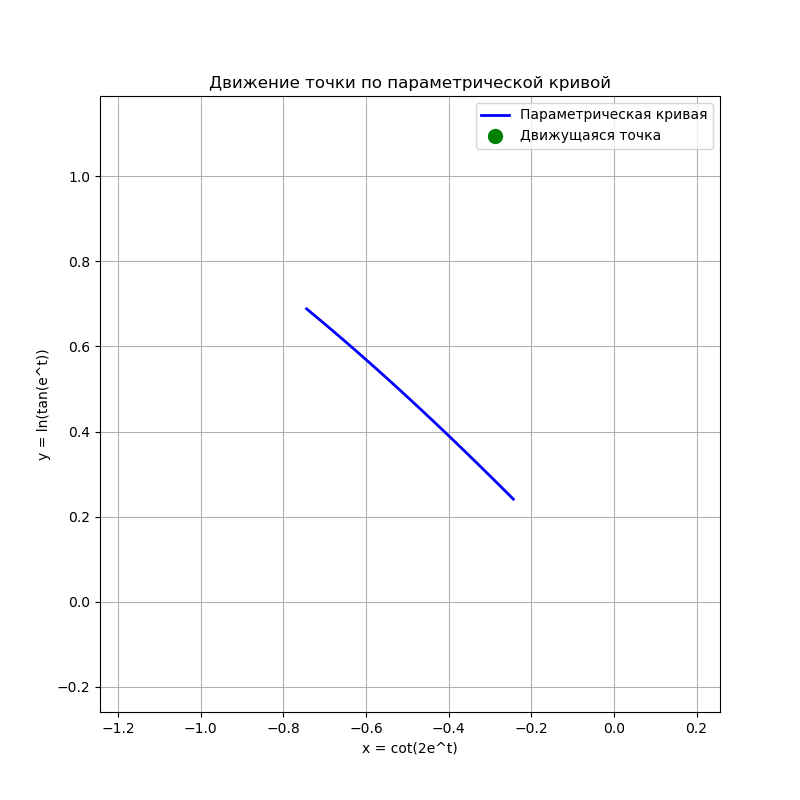

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

t_np = np.linspace(-0.1, 0.1, 100)
e_t = np.exp(t_np)
x_param = 1 / np.tan(2 * e_t)  # cot(2e^t)
y_param = np.log(np.tan(e_t))   # ln(tan(e^t))

mask = np.isfinite(x_param) & np.isfinite(y_param)
x_param = x_param[mask]
y_param = y_param[mask]
t_np = t_np[mask]

x_min, x_max = np.min(x_param), np.max(x_param)
y_min, y_max = np.min(y_param), np.max(y_param)

fig2 = plt.figure(figsize=(8, 8))
ax2 = plt.axes()
ax2.set_xlim(x_min-0.5, x_max+0.5)
ax2.set_ylim(y_min-0.5, y_max+0.5)
ax2.grid(True)
ax2.set_title('Движение точки по параметрической кривой')
ax2.set_xlabel('x = cot(2e^t)')
ax2.set_ylabel('y = ln(tan(e^t))')

#создание объектов для графика и точки
line1, = ax2.plot(x_param, y_param, 'b-', lw=2, label='Параметрическая кривая')
line2, = ax2.plot([], [], 'go', markersize=10, label='Движущаяся точка')
ax2.legend()

#обновляет положение точки
def at_frame2(point):
    """Обновляет положение точки на графике"""
    line2.set_data([point[0]], [point[1]])
    return line2,

def init():
    """Создает начальное состояние графической области"""
    line2.set_data([], [])
    return line2,

#матрица точек
matrix = np.column_stack((x_param, y_param))

ani = FuncAnimation(fig2, at_frame2, frames=matrix, 
                   init_func=init, blit=True, 
                   interval=20, repeat=False)

plt.show()

Определим пользовательскую функцию одного аргумента at_frame2 , которая
будет вызываться в каждом кадре анимации.
Единственный аргумент функции at_frame2 является массивом из и координат
точки графика функции. Функция at_frame2 задает графический объект line2
единственной точкой с координатами 

Полагаем аргумент init_func функции FunAnimation равным пользовательской
функции init : init_func=init . Функция init будет вызываться перед
началом анимации. Назначение функции init : отображение графика функции,
создание графика для отображения точки и создание легенды для двух графиков.

## Задание 3.3. Движение секущей прямой к заданной линии на плоскости(версия 1) 

**Задание** Линия на плоскости задана графиком параметрической функции из Задания 3.1b для t(t_min, t_max). Начальная точка А с координатами (x(t_min),y(t_min)) является неподвижной точкой. Точка B движется последовательно по линии от конечной точки кривой с координатами (x(t_max),y(t_max)) к неподвижной точке A.
Создайте анимацию движения секущей прямой, проходящей через точки А и В до момента совпадении координат точек А и В , когда секущая прямая становится касательной прямой к заданной линии в начальной точке А

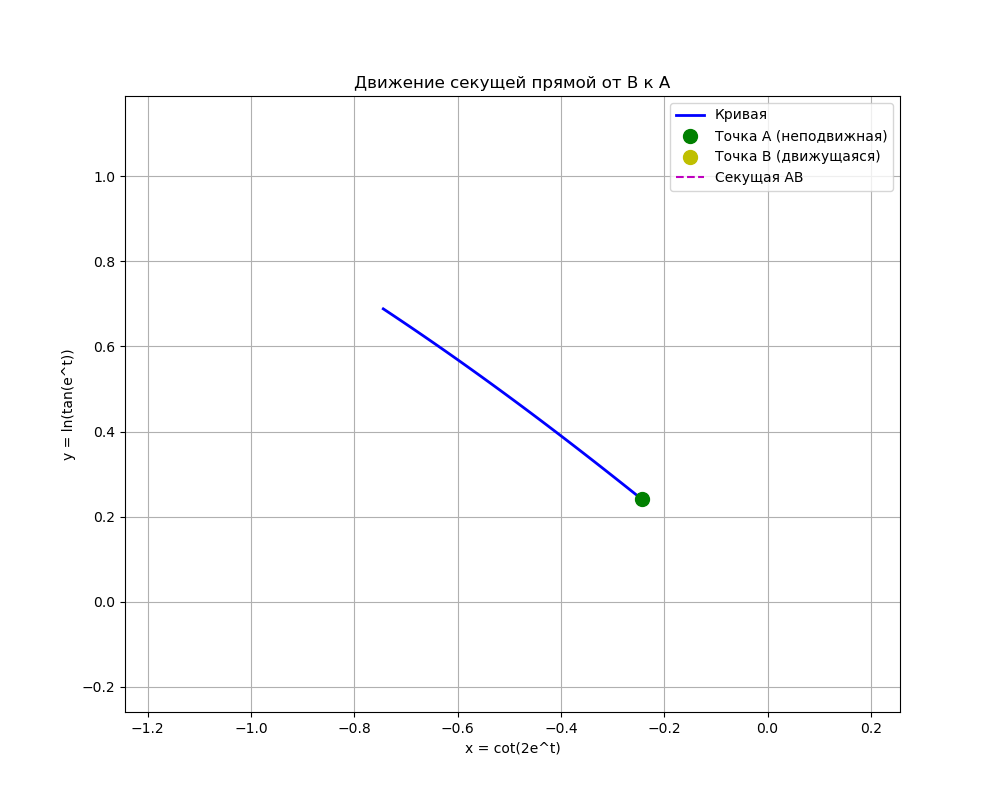

In [41]:
t_min, t_max = -0.1, 0.1
t_np = np.linspace(t_min, t_max, 100)
e_t = np.exp(t_np)
x_param = 1 / np.tan(2 * e_t)  # cot(2e^t)
y_param = np.log(np.tan(e_t))   # ln(tan(e^t))

mask = np.isfinite(x_param) & np.isfinite(y_param)
x_param = x_param[mask]
y_param = y_param[mask]
t_np = t_np[mask]

#координаты точки A
A = (x_param[0], y_param[0])

x_min, x_max = np.min(x_param), np.max(x_param)
y_min, y_max = np.min(y_param), np.max(y_param)

fig = plt.figure(figsize=(10, 8))
ax = plt.axes()
ax.set_xlim(x_min-0.5, x_max+0.5)
ax.set_ylim(y_min-0.5, y_max+0.5)
ax.grid(True)
ax.set_title('Движение секущей прямой от B к A')
ax.set_xlabel('x = cot(2e^t)')
ax.set_ylabel('y = ln(tan(e^t))')

#создание объектов
curve, = ax.plot(x_param, y_param, 'b-', lw=2, label='Кривая')
point_A, = ax.plot(A[0], A[1], 'go', markersize=10, label='Точка A (неподвижная)')
point_B, = ax.plot([], [], 'yo', markersize=10, label='Точка B (движущаяся)')
secant_line, = ax.plot([], [], 'm--', lw=1.5, label='Секущая AB')

ax.legend()

#вычисление касательной в точке A
def tangent():
#вычисляем производные в точке A (используем конечные разности)
    dt = t_np[1] - t_np[0]
    dx_dt = (x_param[1] - x_param[0]) / dt
    dy_dt = (y_param[1] - y_param[0]) / dt
#уравнение касательной: (x - x0)/dx_dt = (y - y0)/dy_dt 
#диапазон касательной 
    x_tangent = np.linspace(A[0]-0.5, A[0]+0.5, 2)
    if abs(dx_dt) > 1e-6 and abs(dy_dt) > 1e-6:
        y_tangent = A[1] + (dy_dt/dx_dt)*(x_tangent - A[0])
    else:
#вертикальная или горизонтальная касательная
        if abs(dx_dt) < 1e-6:
            x_tangent = np.array([A[0], A[0]])
            y_tangent = np.linspace(A[1]-0.5, A[1]+0.5, 2)
        else:
            x_tangent = np.linspace(A[0]-0.5, A[0]+0.5, 2)
            y_tangent = np.array([A[1], A[1]])
    
    return x_tangent, y_tangent
#вычисление касательной
x_tangent, y_tangent = tangent()
tangent_line, = ax.plot([], [], 'k-', lw=2, alpha=0.5, label='Касательная в A')

def init():
    point_B.set_data([], [])
    secant_line.set_data([], [])
    tangent_line.set_data([], [])
    return point_B, secant_line, tangent_line

def animate(i):
#движемся от конца к началу(от B к A)
    idx = len(x_param) - 1 - i  
#координаты точки B
    B = (x_param[idx], y_param[idx])
    point_B.set_data([B[0]], [B[1]])  
#рисуем секущую AB
    secant_line.set_data([A[0], B[0]], [A[1], B[1]])  
#показываем касательную, когда точки почти совпадают 
    if i >= len(x_param) - 5:  
        tangent_line.set_data(x_tangent, y_tangent)
    else:
        tangent_line.set_data([], [])
    
    return point_B, secant_line, tangent_line
#создаем анимацию (идем в обратном порядке - от B к A)
ani = FuncAnimation(fig, animate, frames=len(x_param),
                    init_func=init, blit=True,
                    interval=30, repeat=False)
plt.show()

## Задание 3.4. Движение секущей прямой к заданной линии на плоскости(версия 2)

**Задание** Линия на плоскости задана графиком параметрической функции для t от t_min до t_max из Задания 3.1b. Точка А с координатами (x(t_min),y(t_min))является подвижной точкой на заданной линии, точка В с координатами (x(t_max),y(t_max)) является неподвижной точкой. Точка А движется последовательно по кривой до неподвижной точки В.
Создайте анимацию движения секущей прямой, проходящей через точки А и В до момента совпадении координат точек А и В , когда секущая прямая становится
касательной прямой к заданной линии в конечной точке В. Вычисление
производной в точке В, необходимое для построения касательной прямой,
осуществите с помощью возможностей модуля sympy . Касательную прямую
изобразите красным цветом.

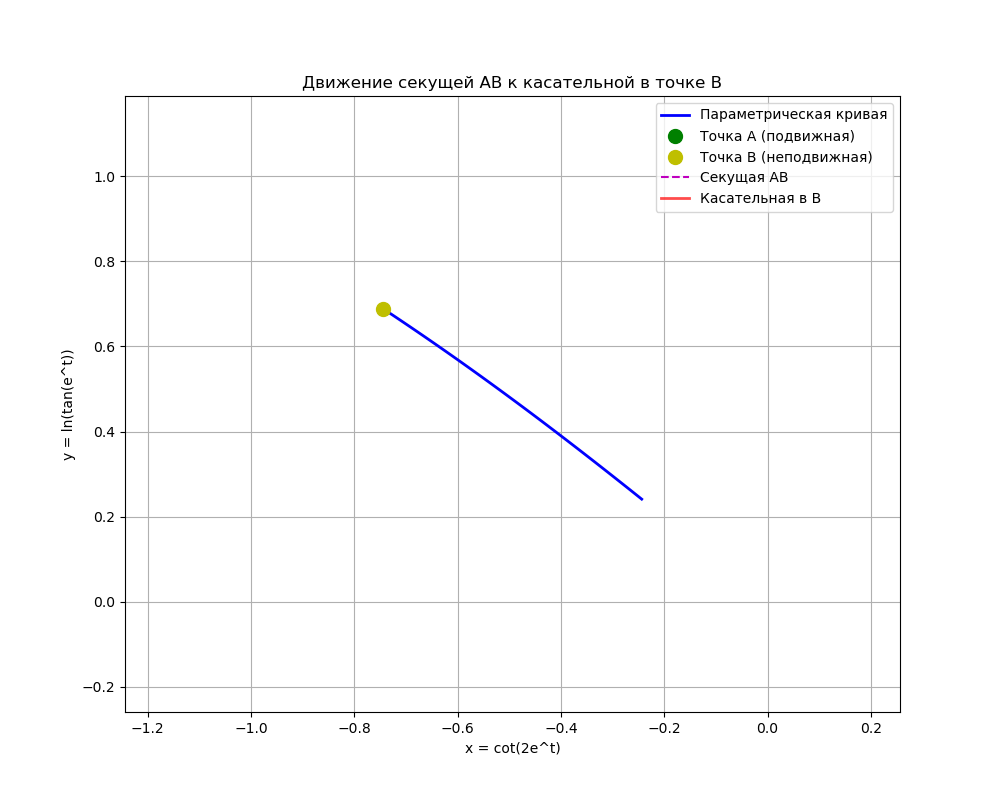

In [47]:
import sympy as sp
t_min, t_max = -0.1, 0.1
t_np = np.linspace(t_min, t_max, 100)
e_t = np.exp(t_np)
x_param = 1 / np.tan(2 * e_t)  # cot(2e^t)
y_param = np.log(np.tan(e_t))   # ln(tan(e^t))
mask = np.isfinite(x_param) & np.isfinite(y_param)
x_param = x_param[mask]
y_param = y_param[mask]
t_np = t_np[mask]

A = (x_param[0], y_param[0])  
B = (x_param[-1], y_param[-1])
x_min, x_max = np.min(x_param), np.max(x_param)
y_min, y_max = np.min(y_param), np.max(y_param)
t = sp.symbols('t')
x_expr = 1 / sp.tan(2 * sp.exp(t))
y_expr = sp.log(sp.tan(sp.exp(t)))

#вычисляем производные в точке B (t = t_max)
dx_dt_B = sp.diff(x_expr, t).subs(t, t_max)
dy_dt_B = sp.diff(y_expr, t).subs(t, t_max)

#вычисление касательной в точке B
def get_tangent_at_B():
    x_tangent = np.linspace(B[0]-0.5, B[0]+0.5, 2)
    if abs(float(dx_dt_B)) > 1e-6:
        y_tangent = B[1] + (float(dy_dt_B)/float(dx_dt_B))*(x_tangent - B[0])
    else:  #вертикальная касательная
        x_tangent = np.array([B[0], B[0]])
        y_tangent = np.linspace(B[1]-0.5, B[1]+0.5, 2)
    return x_tangent, y_tangent

fig = plt.figure(figsize=(10, 8))
ax = plt.axes()
ax.set_xlim(x_min-0.5, x_max+0.5)
ax.set_ylim(y_min-0.5, y_max+0.5)
ax.grid(True)
ax.set_title('Движение секущей AB к касательной в точке B')
ax.set_xlabel('x = cot(2e^t)')
ax.set_ylabel('y = ln(tan(e^t))')

curve, = ax.plot(x_param, y_param, 'b-', lw=2, label='Параметрическая кривая')
point_A, = ax.plot([], [], 'go', markersize=10, label='Точка A (подвижная)')
point_B, = ax.plot(B[0], B[1], 'yo', markersize=10, label='Точка B (неподвижная)')
secant_line, = ax.plot([], [], 'm--', lw=1.5, label='Секущая AB')
tangent_line, = ax.plot([], [], 'r-', lw=2, alpha=0.7, label='Касательная в B')

ax.legend()

def init():
    point_A.set_data([A[0]], [A[1]])
    secant_line.set_data([], [])
    tangent_line.set_data([], [])
    return point_A, secant_line, tangent_line

def animate(i):
#текущее положение точки A
    current_A = (x_param[i], y_param[i])
    point_A.set_data([current_A[0]], [current_A[1]])    
#секущая AB
    secant_line.set_data([current_A[0], B[0]], [current_A[1], B[1]])
#проверяем близость точек A и B
    distance = np.sqrt((current_A[0]-B[0])**2 + (current_A[1]-B[1])**2)    
    if distance < 0.05:  #если точки близки, показываем касательную
        x_tangent, y_tangent = get_tangent_at_B()
        tangent_line.set_data(x_tangent, y_tangent)
    else:
        tangent_line.set_data([], [])  #скрываем касательную
    
    return point_A, secant_line, tangent_line

ani = FuncAnimation(fig, animate, frames=len(x_param),
                    init_func=init, blit=True,
                    interval=30, repeat=False)

plt.show()